In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

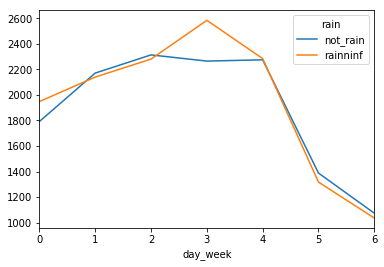

In [130]:
filename = '/Users/baliansnow/Documents/Python/Data analyst/nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)
Entries_rian_day = subway_df.groupby(['rain','day_week'], as_index=False)['ENTRIESn_hourly'].mean()

# replace 0->'not_rain' & 1->'rainning' in column rain
if True:
    Entries_rian_day.rain.replace([0, 1], ['not_rain', 'rainninf'], inplace=True) # function1
#     Entries_rian_day['rain'] = Entries_rian_day['rain'].map({1: 'rainning', 0: 'not_rain'}) #function2

Entries_rian_day.pivot(index='day_week', columns='rain', values='ENTRIESn_hourly').plot()
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


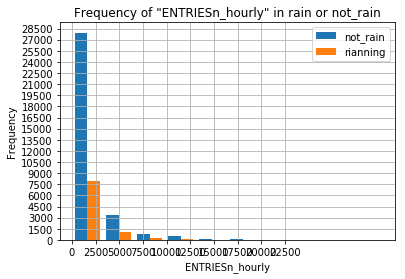

In [25]:
not_rain = subway_df[subway_df.rain == 0]
rainning = subway_df[subway_df.rain == 1]

plt.hist([not_rain['ENTRIESn_hourly'],rainning['ENTRIESn_hourly']],label = ['not_rain','rianning'])
plt.legend()
plt.xlabel('ENTRIESn_hourly')
plt.ylabel('Frequency')
plt.title('Frequency of "ENTRIESn_hourly" in rain or not_rain')
plt.xticks(np.arange(0, 25000, 2500))
plt.yticks(np.arange(0, 30000, 1500))
# plt.axis([0,10000,0,30000])
plt.grid(True)
plt.show()

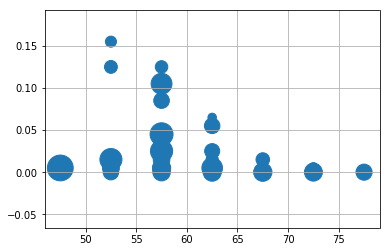

In [129]:
# A scatterplot with subway temperature on one axis and precipitation on the other, ridership is the bubble size
climate_df = subway_df

for temp in range(45,95,5):
    climate_df.loc[(temp < climate_df['meantempi']) & 
                   (climate_df['meantempi'] <= temp+5), 'meantempi'] = temp+2.5

for prec in range(0,16):
    climate_df.loc[(prec/100 < climate_df['meanprecipi']) & 
                   (climate_df['meanprecipi'] <= prec/100+0.01), 'meanprecipi'] = prec/100+0.005

grouped_climate = climate_df.groupby(['meanprecipi','meantempi'], as_index = False).mean()
# print(grouped_climate['meanprecipi'])

scaled_entries = grouped_climate['ENTRIESn_hourly']/grouped_climate['ENTRIESn_hourly'].std()*150

plt.scatter(grouped_climate['meantempi'], grouped_climate['meanprecipi'], s = scaled_entries)
plt.grid(True)
plt.show()

In [ ]:
# pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')